# House Price Data Exploration

This Notebook focuses on Extensive Exploration of House Prices Data. The aim of this exploration is to analyse the large number of Features available and establish a relationship among them. This will further help us in Feature Extraction, Feature Engineering. Later, the final features obtained will be used for Continuous Value Prediction of Quantitative values using different types of Regressions and a Feed-Forward Neural Network. The results obtained is compared to get the best working model

Let's get started!

The first cell in this notebook contains all the dependencies that we will require throughout this exploration

In [78]:
import numpy as np #Matrix-Maths
import pandas as pd #Dataframes
import seaborn as sns #Data Visualisation Advance
from matplotlib import pyplot as plt #Data Visualisation Basic

%matplotlib inline

The first thing we need to do is to read the training data in a dataframe. The data.head() function below displays the first five rows of our dataset. The dataset contains 81 columns which contains Qualitative, Quantitative and Categorically Ordered values

In [3]:
data = pd.read_csv('Data/train.csv', delimiter=',')

In [50]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Working with such a high number of features might not be useful in making accurate features. We do not know the importance of every feature. Some features might just add noise to good prediction results. Some features might be highly correlated to others. Lastly, there might be some features in which most of the columns are missing and we need to either fill in the missing value or drop that feature. As stated above, this notebook focuses on extensive data exploration. Thus, the focus will be to explore the available feature vectors and the relations among themselves. The end result will be a set of extracted features which can later be used for feature engineering and prediction tasks

Lets try to analyse different features based on missing values

In [28]:
data.shape

(1460, 81)

data.shape() function shows that we have a total of 1460 rows. Calculating the fraction of NaN below to get a rough idea about the values present in columns

In [53]:
nan_frac = data.isnull().sum(axis=0).sort_values(ascending=False)
for index, val in nan_frac.iteritems():
    if(val>0):
        print(index, val)

PoolQC 1453
MiscFeature 1406
Alley 1369
Fence 1179
FireplaceQu 690
LotFrontage 259
GarageCond 81
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
BsmtExposure 38
BsmtFinType2 38
BsmtFinType1 37
BsmtCond 37
BsmtQual 37
MasVnrArea 8
MasVnrType 8
Electrical 1


We see the above mentioned columns contain NaN values. The fraction of NaN values in each of these features is below. As a rule of thumb, we should discard columns in which NaN fraction is greater than 10%. This means we need to remove the features shown below

In [55]:
nan_frac = data.isnull().sum(axis=0).sort_values(ascending=False) / data.shape[0]
for index, val in nan_frac.iteritems():
    if(val>0.1):
        print(index, val)

PoolQC 0.9952054794520548
MiscFeature 0.963013698630137
Alley 0.9376712328767123
Fence 0.8075342465753425
FireplaceQu 0.4726027397260274
LotFrontage 0.1773972602739726


In [56]:
data = data.drop([index for index, val in nan_frac.iteritems() if(val>0.1)], axis=1)

The six features mentioned above is removed and it is verified using shape of dataframe

In [57]:
data.shape

(1460, 75)

In [60]:
data.count(axis=0, numeric_only=True).keys()

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [61]:
len(data.count(axis=0, numeric_only=True).keys())

37

Out of 75 columns, 37 columns contains numerical entries and the rest is either categorical or categorically ordered

In [67]:
data['YearBuilt'].corr(data['GarageYrBlt'], method='pearson')

0.8256674841743423

As expected, the YearBuilt and GarageYrBlt is highly correlated and thus provides redundant information. In most of the cases, garages are built at the same time as house. Thus removing GarageYrBlt

In [68]:
data = data.drop(['GarageYrBlt'], axis=1)

In [70]:
data.shape

(1460, 74)

The number of cars that can be accumulated in a garage is directly related to the area of garage as is evident in the numerical figure shown below

In [71]:
data['GarageArea'].corr(data['GarageCars'], method='pearson')

0.882475414281462

In [72]:
data = data.drop(['GarageCars'], axis=1)

GrLivArea and HalfBath is highly unrelated as seen below

In [74]:
data['GrLivArea'].corr(data['HalfBath'], method='pearson')

0.4157716361052653

Calculating correlations of each variable to form a matrix of corr values

In [77]:
corr_mat = data.corr(method='pearson')
corr_mat

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


The correlation matrix we obtained here is very informative but difficult to read and interpret by humans, considering the huge number of features. A better way is to plot a heat-map with color intensity varying with values in matrix

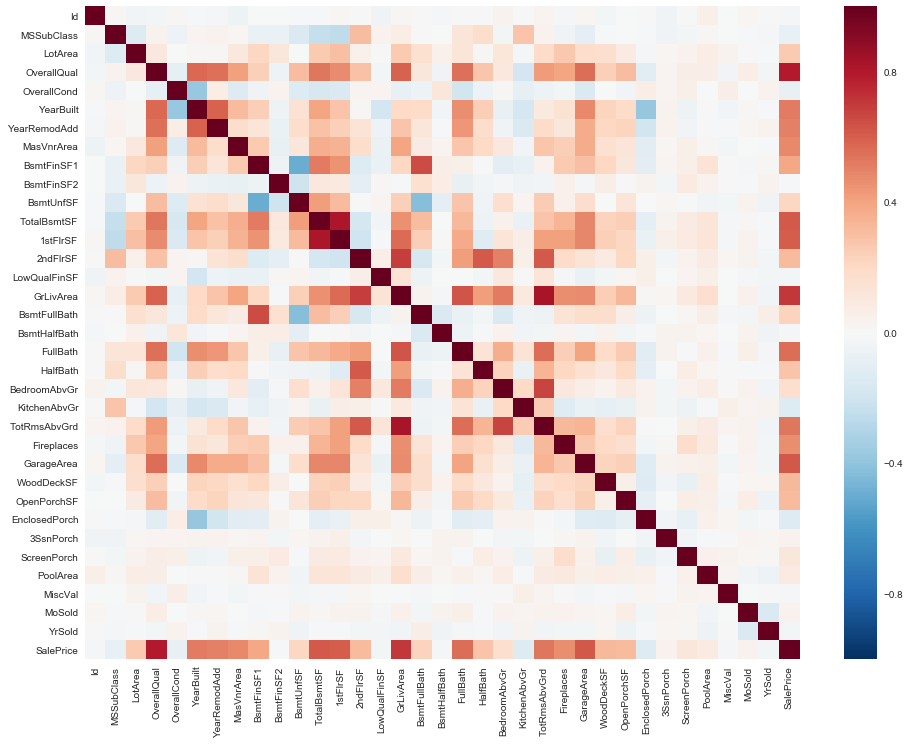

In [84]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_mat)

The dark shades in heatmap corresponds to highly correlated features whereas blue shade represent highly uncorrelated features. The white shows features that are neutral. We prefer neutral and uncorrelated features as they provide new perspective to the analysis under consideration. Correlated features provide redundant information and thus can be removed. Our target variable is saleprice and the features affecting that is of special interest to us

This correlation matrix is made only using numerical features. No categorical features has been taken into consideration and they must be dealt separately